# Double 7's (Short Term Trading Strategies that Work)

    1. The SPY is above its 200-day moving average
    2. The SPY closes at a X-day low, buy some shares
       If it set further lows, buy some more
    3. If the SPY closes at a X-day high, sell some.
       If it sets further highs, sell some more, etc...
    
    (Scaling in and out)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from talib.abstract import *

import pinkfish as pf
import strategy

# format price data
pd.options.display.float_format = '{:0.2f}'.format

%matplotlib inline

In [2]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

Some global data

In [3]:
#symbol = '^GSPC'
symbol = 'SPY'
#symbol = 'DIA'
#symbol = 'QQQ'
#symbol = 'IWM'
#symbol = 'TLT'
#symbol = 'GLD'
#symbol = 'AAPL'
#symbol = 'BBRY'
#symbol = 'GDX'
capital = 10000
start = datetime.datetime(2000, 1, 1)
end = datetime.datetime.now()

Define high low trade periods

In [4]:
period = 7

Define max number of positions to scale into

In [5]:
max_positions = 4

Run Strategy

In [6]:
s = strategy.Strategy(symbol, capital, start, end, period=period, max_positions=max_positions)
s.run()

Retrieve log DataFrames

In [7]:
tlog, dbal = s.get_logs()
stats = s.get_stats()

In [8]:
tlog.tail()

,entry_date,entry_price,exit_date,exit_price,pl_points,pl_cash,qty,cumul_total,direction,symbol
427,2020-01-31,321.73,2020-02-05,332.86,11.13,211.47,19,15607.54,LONG,SPY
428,2020-02-21,333.48,2020-03-04,312.86,-20.62,-391.78,19,15215.76,LONG,SPY
429,2020-02-24,322.42,2020-03-26,261.20,-61.22,-1163.18,19,14052.58,LONG,SPY
430,2020-02-25,312.65,2020-03-30,261.65,-51.00,-1071.00,21,12981.58,LONG,SPY
431,2020-02-26,311.50,2020-04-06,264.86,-46.64,-979.44,21,12002.14,LONG,SPY


In [9]:
dbal.tail()

,high,low,close,shares,cash,state
date,,,,,,
2020-06-16,22002.14,22002.14,22002.14,0,22002.14,-
2020-06-17,22002.14,22002.14,22002.14,0,22002.14,-
2020-06-18,22002.14,22002.14,22002.14,0,22002.14,-
2020-06-19,22002.14,22002.14,22002.14,0,22002.14,-
2020-06-22,22002.14,22002.14,22002.14,0,22002.14,-


Generate strategy stats - display all available stats

In [10]:
pf.print_full(stats)

start                                                   2000-01-03
end                                                     2020-06-22
beginning_balance                                            10000
ending_balance                                            22002.14
total_net_profit                                          12002.14
gross_profit                                              24827.20
gross_loss                                               -12825.06
profit_factor                                                 1.94
return_on_initial_capital                                   120.02
annual_return_rate                                            3.93
trading_period                           20 years 5 months 19 days
pct_time_in_market                                           39.77
total_num_trades                                               432
trades_per_year                                              21.11
num_winning_trades                                            

Equity curve

Run Benchmark, Retrieve benchmark logs, and Generate benchmark stats

In [11]:
benchmark = pf.Benchmark(symbol, capital, s._start, s._end)
benchmark.run()
benchmark.tlog, benchmark.dbal = benchmark.get_logs()
benchmark.stats = benchmark.get_stats()

2000-01-03 00:00:00 BUY  68 SPY @ 145.44
2020-06-22 00:00:00 SELL 68 SPY @ 310.67


Plot Equity Curves: Strategy vs Benchmark

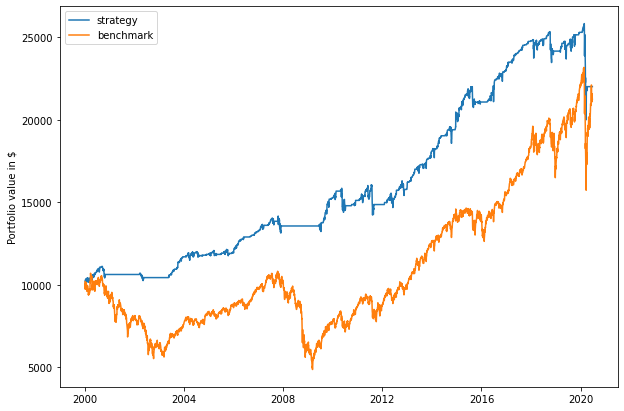

In [12]:
pf.plot_equity_curve(dbal, benchmark=benchmark.dbal)

Plot Trades

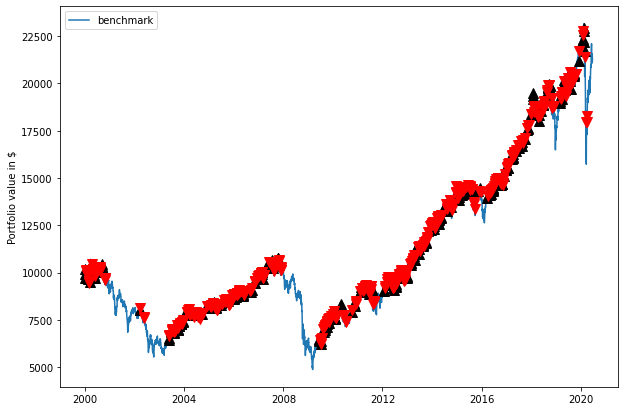

In [13]:
pf.plot_trades(dbal, benchmark=benchmark.dbal)

Bar Graph: Strategy vs Benchmark

,strategy,benchmark
annual_return_rate,3.93,3.75
max_closed_out_drawdown,-22.57,-55.00
drawdown_annualized_return,-5.75,-14.67
drawdown_recovery,-0.08,-1.41
best_month,10.05,20.91
worst_month,-22.57,-30.99
sharpe_ratio,0.62,0.31
sortino_ratio,0.45,0.40
monthly_std,1.65,4.38


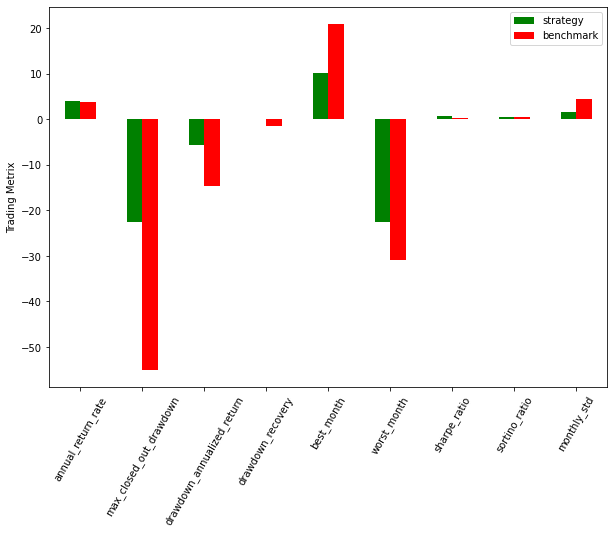

In [14]:
df = pf.plot_bar_graph(stats, benchmark.stats)
df